## This script takes relative abundances of all genes and groups them into the KEGG 'Subgroup2' category. All categories are then plotted in a heat map using the Seaborn clustermap function.

In [1]:
import os as os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Navigate to directory containing read counts file
os.chdir("/Users/nastassia.patin/Desktop/Projects/BlueHole/ISMEJ_revisions/")
path = "60Ms_vs_deeps_KOs_readcounts.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis [PATH:ko00010],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
1,Metabolism,Carbohydrate metabolism,Galactose metabolism [PATH:ko00052],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
2,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism [PATH:ko00500],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
3,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism [P...,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
4,Metabolism,Biosynthesis of other secondary metabolites,Streptomycin biosynthesis [PATH:ko00521],K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms


In [4]:
# Exclude irrelevant KEGG categories
df = df.loc[(df['Group'] != 'Human Diseases') & 
               (df['Group'] != 'Brite Hierarchies') & 
               (df['Group'] != 'Organismal Systems') &
               (df['Subgroup'] != 'Cellular community - eukaryotes')]

In [5]:
# Edit 'Subgroup2' annotations to just the category name
df[['Subgroup2', 'PATH']] = df['Subgroup2'].str.split("[", n=1, expand=True)
df2 = df.drop('PATH', axis=1)
df2.head()

,Group,Subgroup,Subgroup2,KO,Function,ReadCounts,Sample,GE,ReadCounts_Norm,dataset
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
1,Metabolism,Carbohydrate metabolism,Galactose metabolism,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
2,Metabolism,Carbohydrate metabolism,Starch and sucrose metabolism,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
3,Metabolism,Carbohydrate metabolism,Amino sugar and nucleotide sugar metabolism,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms
4,Metabolism,Biosynthesis of other secondary metabolites,Streptomycin biosynthesis,K00845,glk; glucokinase [EC:2.7.1.2],629,BH091960M,2401.2,0.261952,60Ms


### Split the data frame by dataset

In [53]:
df_G1 = df2.loc[(df2['dataset'] == '60Ms')]
df_G2 = df2.loc[(df2['dataset'] == 'deeps')]

In [54]:
df_G1_sub = df_G1[['KO','Sample','ReadCounts_Norm']]
df_G2_sub = df_G2[['KO','Sample','ReadCounts_Norm']]

### Concatenate the two data sets while maintaining the information as to which row is from which data set

In [55]:
concat = pd.concat([df_G1_sub.assign(dataset='60Ms'), df_G2_sub.assign(dataset='Deeps')])
concat.head()

,KO,Sample,ReadCounts_Norm,dataset
2,K09991,BH091960M,0.000833,60Ms
3,K13588,BH091960M,0.000833,60Ms
4,K19411,BH091960M,0.000833,60Ms
5,K15761,BH091960M,0.001249,60Ms
6,K08973,BH37,0.001520,60Ms


In [116]:
# Reformat data frame for the heat map
df4 = pd.pivot_table(data=concat, index='Sample', values='ReadCounts_Norm', columns='KO')
df4 = df4.fillna(0).reindex(["BH37","BH091960M","BH51","BH091995M"])
df4.head()

KO,K00003,K00005,K00009,K00010,K00012,K00013,K00014,K00015,K00016,K00018,...,K23492,K23508,K23514,K23518,K23535,K23536,K23537,K23548,K23549,K23573
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.358456,0.000000,0.000000,0.308464,0.512080,0.743048,0.761282,0.057742,0.000000,0.217292,...,0.000000,0.000000,0.000000,0.000000,0.945145,0.791673,1.186750,0.000000,0.000000,0.000000
BH091960M,0.592620,0.000000,0.000000,0.084541,0.534733,0.415209,0.906630,0.034150,0.000000,0.285274,...,0.016242,0.000000,0.032067,0.052057,0.853323,1.465517,0.294436,0.000000,0.000000,0.018741
BH51,1.137606,0.000000,0.000000,0.072032,0.444610,1.043219,1.140089,0.094386,0.000000,0.057129,...,0.000000,0.000000,0.074516,0.074516,0.000000,0.000000,0.146547,0.000000,0.176354,1.266766
BH091995M,0.840408,0.053743,0.031155,0.031155,1.314744,0.498481,0.774204,0.056858,0.014799,0.071657,...,0.000000,0.022587,0.116832,0.038165,0.147987,0.153439,0.232884,0.102033,0.131630,2.562505


### Calculate the fold difference between sample pairs

In [58]:
def fold_difference(a, b, c, d):
    diff = ((a + b)/2) / ((c + d)/2)
    return(diff)

In [117]:
df4 = df4.replace(0, 0.000000001)
df4 = df4.append(pd.Series(name='Average'))
df4 = df4.append(pd.Series(name='Fold difference', dtype='float64'))
df4.loc['Average'] = np.array(np.mean(df4.iloc[:3, :], axis=0))
df4.loc['Fold difference'] = df4.apply(lambda x: 
                                           fold_difference(x.loc['BH37'], x.loc['BH091960M'], 
                                                           x.loc['BH51'], x.loc['BH091995M']), axis=0)
df4.head(6)

<ipython-input-117-00ed9ada64a9>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df4 = df4.append(pd.Series(name='Average'))


KO,K00003,K00005,K00009,K00010,K00012,K00013,K00014,K00015,K00016,K00018,...,K23492,K23508,K23514,K23518,K23535,K23536,K23537,K23548,K23549,K23573
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.358456,1.000000e-09,1.000000e-09,0.308464,0.512080,0.743048,0.761282,0.057742,1.000000e-09,0.217292,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,9.451451e-01,7.916730e-01,1.186750,1.000000e-09,1.000000e-09,1.000000e-09
BH091960M,0.592620,1.000000e-09,1.000000e-09,0.084541,0.534733,0.415209,0.906630,0.034150,1.000000e-09,0.285274,...,1.624188e-02,1.000000e-09,3.206730e-02,5.205730e-02,8.533233e-01,1.465517e+00,0.294436,1.000000e-09,1.000000e-09,1.874063e-02
BH51,1.137606,1.000000e-09,1.000000e-09,0.072032,0.444610,1.043219,1.140089,0.094386,1.000000e-09,0.057129,...,1.000000e-09,1.000000e-09,7.451565e-02,7.451565e-02,1.000000e-09,1.000000e-09,0.146547,1.000000e-09,1.763537e-01,1.266766e+00
BH091995M,0.840408,5.374250e-02,3.115507e-02,0.031155,1.314744,0.498481,0.774204,0.056858,1.479866e-02,0.071657,...,1.000000e-09,2.258743e-02,1.168315e-01,3.816497e-02,1.479866e-01,1.534387e-01,0.232884,1.020329e-01,1.316302e-01,2.562505e+00
Average,1.029561,1.000000e-09,1.000000e-09,0.155012,0.497141,0.733825,0.936001,0.062093,1.000000e-09,0.186565,...,5.413960e-03,1.000000e-09,3.552765e-02,4.219098e-02,5.994895e-01,7.523967e-01,0.542578,1.000000e-09,5.878457e-02,4.285022e-01
Fold difference,0.986382,3.721449e-08,6.419500e-08,3.808671,0.594998,0.751286,0.871294,0.607570,1.351474e-07,3.902356,...,8.120940e+06,8.854482e-08,1.675870e-01,4.619899e-01,1.215291e+01,1.471069e+01,3.903696,1.960153e-08,6.493846e-09,4.894047e-03


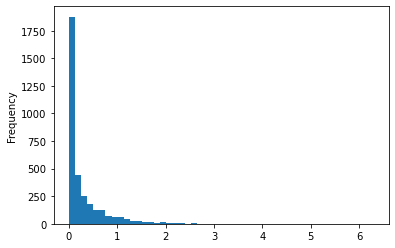

In [120]:
ax = df4.loc['Average'].plot.hist(bins=50, alpha=1)

### Select only the columns (subgroups2) with a five-fold or greater difference

In [161]:
df5 = df4.loc[:, ((df4.loc['Average'] > 0.2) & 
                  ((df4.loc['Fold difference'] < 0.05) | (df4.loc['Fold difference'] > 20)))]
df5.shape

In [163]:
df5 = df5.sort_values(by='Fold difference', axis=1)
df5.head()

In [165]:
# Just get the sample rows
df6 = df5.iloc[0:4, :]
df6.head()

KO,K05349,K02567,K07716,K11942,K06959,K13040,K05367,K07641,K04561,K02319,...,K02182,K09472,K18593,K03338,K07577,K06954,K14260,K22187,K23464,K01637
Sample,,,,,,,,,,,,,,,,,,,,,
BH37,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,6.154080e-01,6.321228e-01,1.066707e+00,1.098617e+00,1.021121e+00,7.582434e-01,7.308920e-01,1.189789e+00,1.083422e+00,1.340222e+00
BH091960M,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,3.452440e-01,3.960520e-01,1.000000e-09,1.415959e-02,1.465934e-01,4.193736e-01,5.234883e-01,1.961519e-01,5.805431e-01,1.033233e+00
BH51,6.756085e-01,3.060109e+00,2.071535e+00,7.973174e-01,6.209637e-01,1.671634e+00,6.135122e-01,1.403378e+00,1.239444e+00,9.612519e-01,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
BH091995M,4.618740e+00,9.253057e-01,9.790482e-01,1.671470e+00,1.336553e+00,8.801309e-02,1.084197e+00,2.102968e-02,8.411870e-02,1.386401e-01,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09


### Match Subgroups2 with Groups and make color bar for heat map

In [166]:
groups = list(df6.columns.values)

In [167]:
df6_func = df3.loc[df3['KO'].str.fullmatch('|'.join(groups))]
df6_func = df6_func[['Group','KO']]
df6_func = df6_func.drop_duplicates()
df6_func.shape

(106, 2)

In [168]:
df6_func

,Group,KO
127,Metabolism,K02568
171,Not Included in Pathway or Brite,K07182
362,Metabolism,K02305
371,Not Included in Pathway or Brite,K03281
383,Metabolism,K01434
...,...,...
7801,Metabolism,K02567
7893,Environmental Information Processing,K07716
7988,Metabolism,K01637
8045,Metabolism,K18593


In [169]:
# Transform data frame for better visualization
df6_log = np.log(df6)
df6_sqrt = np.sqrt(df6)
df6_frthrt = np.sqrt(df6_sqrt)

#### Make the color bar for KEGG Groups

In [170]:
lut = dict(zip(df6_func['Group'].unique(), 
                sns.color_palette("Paired")))
lut

{'Metabolism': (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 'Not Included in Pathway or Brite': (0.12156862745098039,
  0.47058823529411764,
  0.7058823529411765),
 'Environmental Information Processing': (0.6980392156862745,
  0.8745098039215686,
  0.5411764705882353),
 'Genetic Information Processing': (0.2,
  0.6274509803921569,
  0.17254901960784313),
 'Cellular Processes': (0.984313725490196, 0.6039215686274509, 0.6)}

In [171]:
df6_func['Color'] = df6_func['Group'].map(lut)
df6_func.shape

(106, 3)

In [172]:
lut3 = dict(zip(df6_func['KO'], df6_func['Color']))
column_colors = pd.Series(lut3)

In [174]:
column_colors

K02568    (0.6509803921568628, 0.807843137254902, 0.8901...
K07182    (0.12156862745098039, 0.47058823529411764, 0.7...
K02305    (0.6509803921568628, 0.807843137254902, 0.8901...
K03281    (0.12156862745098039, 0.47058823529411764, 0.7...
K01434    (0.6509803921568628, 0.807843137254902, 0.8901...
                                ...                        
K12308    (0.6509803921568628, 0.807843137254902, 0.8901...
K02567    (0.6509803921568628, 0.807843137254902, 0.8901...
K07716    (0.6980392156862745, 0.8745098039215686, 0.541...
K01637    (0.6509803921568628, 0.807843137254902, 0.8901...
K18593    (0.6509803921568628, 0.807843137254902, 0.8901...
Length: 101, dtype: object

### Set palette for color bar

In [32]:
my_palette = dict(zip(concat.dataset.unique(), ["purple","orange"]))
row_colors = concat.dataset.map(my_palette)
sampz = concat.Sample

In [33]:
sample_colors = sampz.to_frame().join(row_colors)
sample_colors = sample_colors.drop_duplicates(subset=['Sample'])
sample_colors = sample_colors.set_index('Sample')
sample_colors.head()

,dataset
Sample,
BH091960M,purple
BH37,purple
BH091995M,orange
BH51,orange


## Make the clustermap

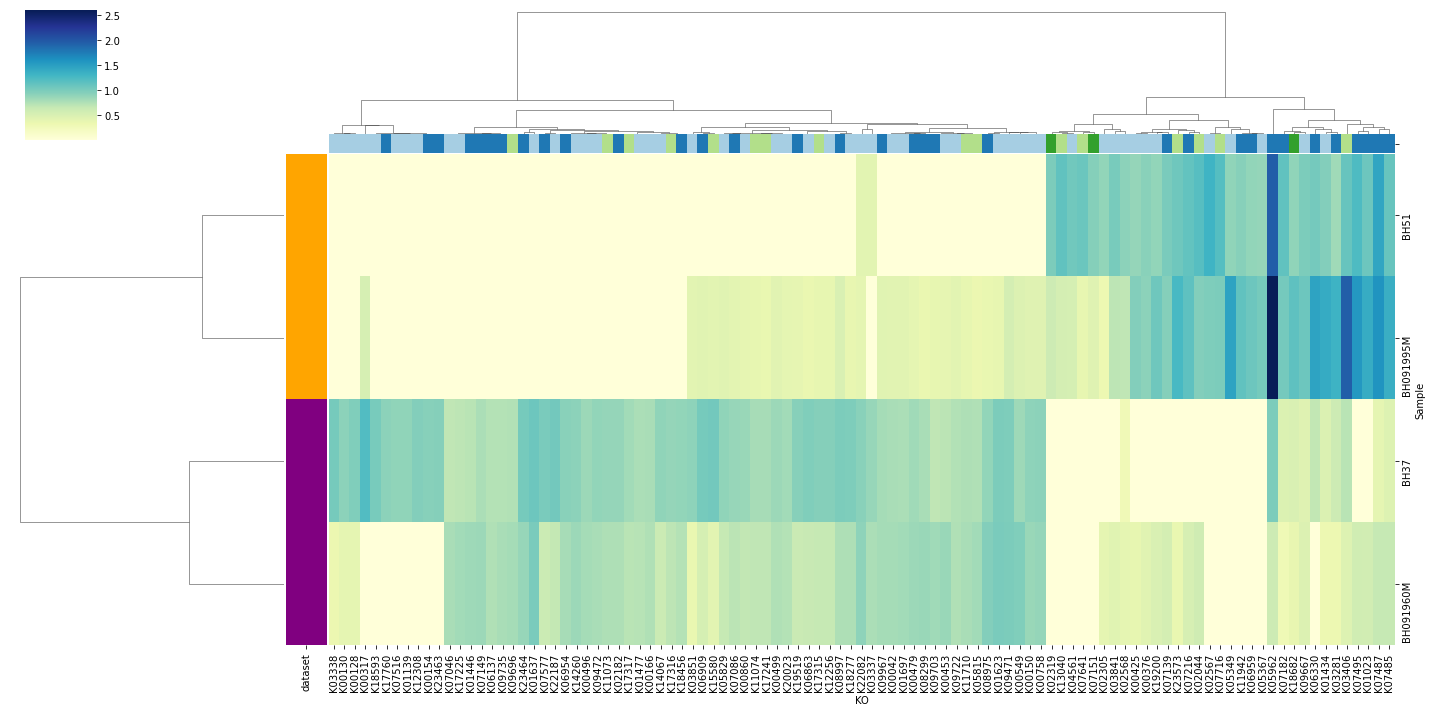

In [175]:
p = sns.clustermap(df6_frthrt, cmap='YlGnBu', figsize=(20,10), xticklabels=True, method='ward',
                   metric='euclidean', row_colors = sample_colors, col_colors=column_colors)

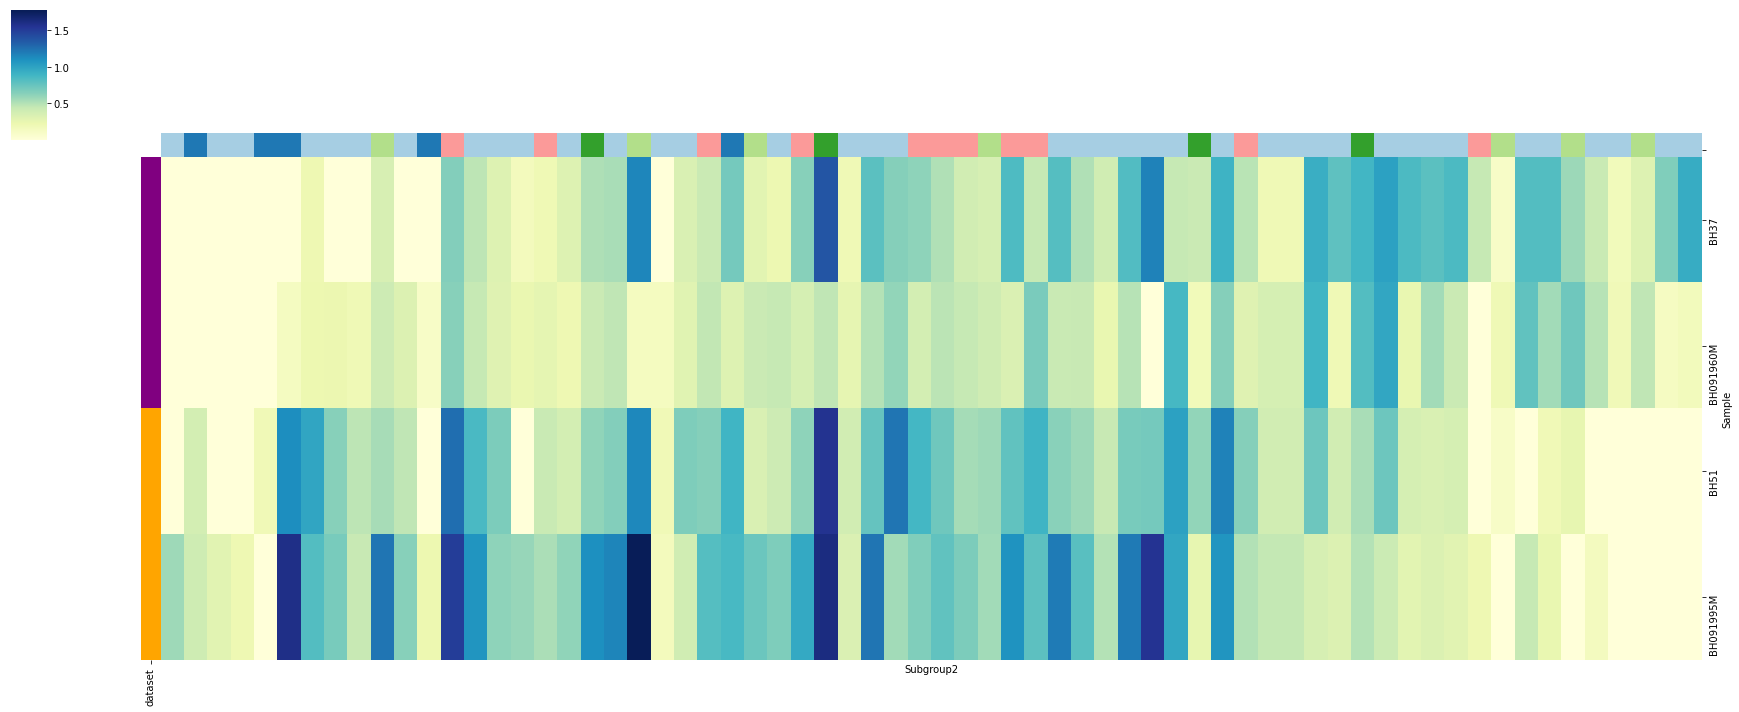

In [42]:
p = sns.clustermap(df6_sqrt, cmap='YlGnBu', method='ward', metric='euclidean', xticklabels=False, row_cluster=False,
                   col_cluster=False, yticklabels=True, row_colors = sample_colors, col_colors = column_colors)
hm = p.ax_heatmap.get_position()
col = p.ax_col_dendrogram.get_position()
#p.ax_heatmap.invert_yaxis()
#plt.setp(p.ax_heatmap.yaxis.get_majorticklabels(), fontsize=18)
#plt.setp(p.ax_heatmap.xaxis.get_majorticklabels(), fontsize=22)
#plt.setp(p.ax_heatmap.yaxis.invert())
p.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*3, hm.height])
p.ax_col_colors.set_position([col.x0, col.y0-0.04, col.width*3, col.height*0.25])
#row = p.ax_row_dendrogram.get_position()
#p.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*3, col.height*0.5])
#p.ax_row_dendrogram.set_position([row.x0+0.07, row.y0, row.width*0.75, row.height])
#p.ax_col_dendrogram.set_visible(False)

In [43]:
p.savefig("FigS6B_new.png")

#### Make legend for KEGG Groups

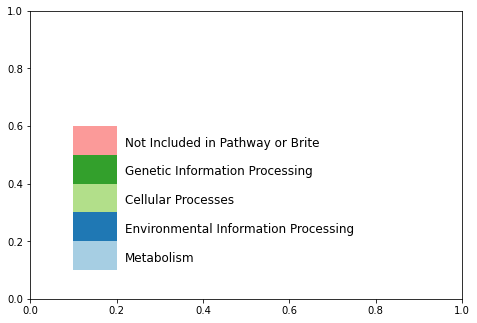

In [34]:
x, y = (0.1, 0)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for func in df6_func['Group'].unique():
    y = y + 0.1
    color = lut[func]
    #cat = lut3[ko]
    square = plt.Rectangle((x, y), 0.1, 0.1, fc=color)
    plt.gca().add_patch(square)
    plt.text(x + 0.12, y + 0.03, func, fontsize=12)

In [79]:
fig.savefig('FigS6B_legend.png')